In [62]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [63]:
data_train = pd.read_csv('data_gold_price.csv')
data_train.head()

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


In [64]:
data_train.isnull().sum()

Date     0
Value    0
dtype: int64

In [65]:
dates = data_train['Date'].values
values = data_train['Value'].values

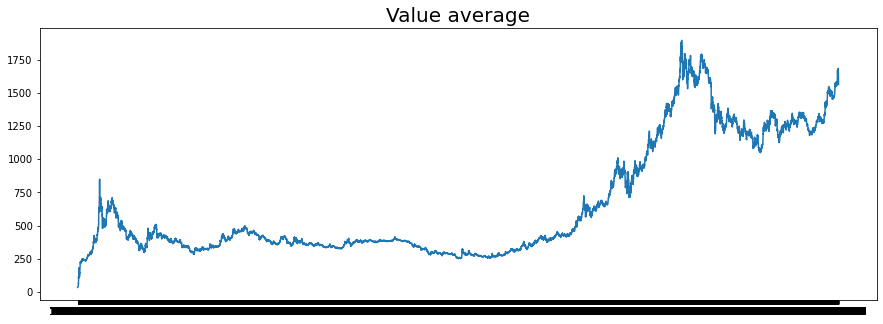

In [66]:
plt.figure(figsize=(15,5))
plt.plot(dates, values)
plt.title('Value average',
          fontsize=20);

In [67]:
#def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  #series = tf.expand_dims(series, axis=-1)
  #ds = tf.data.Dataset.from_tensor_slices(series)
  #ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
  #ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  #ds = ds.shuffle(shuffle_buffer)
  #ds = ds.map(lambda w: (w[:-1], w[-1:]))
  #return ds.batch(batch_size).prefetch(1)

In [68]:
#from sklearn.model_selection import train_test_split
#dates_latih, dates_test, values_latih, values_test = train_test_split(dates, values, test_size=0.2)

In [69]:
data_num = len(data_train['Value'])
val_split = 0.2

val_num = int(val_split * data_num)
train_num = data_num - val_num

In [70]:
val_num

2157

In [71]:
train_num

8630

In [72]:
val = data_train[train_num:]
train = data_train[:train_num]

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler_data = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler_data.fit_transform(data_train['Value'].values.reshape(-1,1))

threshold_mae = (scaled_data.max() - scaled_data.min()) * 1/10
threshold_mae

0.1

In [74]:
scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(train['Value'].values.reshape(-1,1))

scaler_val = MinMaxScaler(feature_range=(0, 1))
scaled_val = scaler_val.fit_transform(val['Value'].values.reshape(-1,1))

In [75]:
def create_dataset(dataset, look_back=30):
    data_X, data_Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        data_X.append(a)
        data_Y.append(dataset[i + look_back, 0])
    return np.array(data_X), np.array(data_Y)

X_val, Y_val = create_dataset(scaled_val)
X_train, Y_train = create_dataset(scaled_train)

In [76]:
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [77]:
#train_set = windowed_dataset(values, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(1024, return_sequences=True),
    tf.keras.layers.LSTM(512),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1),
])


In [78]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='mean_absolute_error',
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(X_train, Y_train,
                    epochs=100,
                    validation_data=[X_val, Y_val])

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


269/269 [==============================] - 7s 10ms/step - loss: 0.0399 - mae: 0.0399 - val_loss: 0.0468 - val_mae: 0.0468
Epoch 2/100
269/269 [==============================] - 2s 8ms/step - loss: 0.0253 - mae: 0.0253 - val_loss: 0.0472 - val_mae: 0.0472
Epoch 3/100
269/269 [==============================] - 2s 7ms/step - loss: 0.0209 - mae: 0.0209 - val_loss: 0.0352 - val_mae: 0.0352
Epoch 4/100
269/269 [==============================] - 2s 7ms/step - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0318 - val_mae: 0.0318
Epoch 5/100
269/269 [==============================] - 2s 7ms/step - loss: 0.0170 - mae: 0.0170 - val_loss: 0.0557 - val_mae: 0.0557
Epoch 6/100
269/269 [==============================] - 2s 7ms/step - loss: 0.0170 - mae: 0.0170 - val_loss: 0.0557 - val_mae: 0.0557
Epoch 7/100
269/269 [==============================] - 2s 7ms/step - loss: 0.0167 - mae: 0.0167 - val_loss: 0.0424 - val_mae: 0.0424
Epoch 8/100
269/269 [==============================] - 2s 8ms/step - loss: 0.016